# $\bar{X}$的期望值和标准差

假设有n个独立同分布的随机变量 $X_1, X_2, ..., X_n$，服从同一个分布且具有相同的期望值（$\mu$）和标准差（$\sigma$）。

1. $\bar{X}$的期望值：

由期望的线性性质($E(aX) = aE(X)$):

$$E(\bar{X}) = E\left(\frac{1}{n}\sum_{i=1}^{n}X_i\right) = \frac{1}{n}\sum_{i=1}^{n}E(X_i) = \frac{1}{n} \cdot n \cdot \mu = \mu$$

2. $\bar{X}$的标准差：

由方差的线性性质($Var(aX) = a^2Var(X)$)：

$$Var(\bar{X}) = Var\left(\frac{1}{n}\sum_{i=1}^{n}X_i\right) = \frac{1}{n^2} \sum_{i=1}^{n} Var(X_i)$$

由于$X_i$是独立同分布的，它们的方差相等，可以简化为：

$$Var(\bar{X}) = \frac{1}{n^2} \cdot n \cdot \sigma^2 = \frac{\sigma^2}{n}$$

由此，样本均值的标准差等于方差的平方根：

$$\sigma_{\bar{X}} = \sqrt{Var(\bar{X})} = \sqrt{\frac{\sigma^2}{n}} = \frac{\sigma}{\sqrt{n}}$$



# 样本方差$S^2$的期望值

假设有一个总体的随机变量X，它的方差为$\sigma^2$。我们从这个总体中抽取n个样本，记作$X_1, X_2, ..., X_n$。

样本方差（denoted as $S^2$）可以定义为：

$$S^2 = \frac{1}{n-1}\sum_{i=1}^{n}(X_i - \bar{X})^2$$

其中，$\bar{X}$是样本的均值。

利用以下性质:

1. 期望值的线性性质：
   $$E(aX) = aE(X)$$

2. 样本均值的期望值：
   $$E(\bar{X}) = E\left(\frac{1}{n}\sum_{i=1}^{n}X_i\right) = \frac{1}{n}\sum_{i=1}^{n}E(X_i) = \frac{1}{n} \cdot n \cdot \mu = \mu$$

3. 方差的期望值：
   $$E(X^2) = Var(X) + (E(X))^2 = \sigma^2 + \mu^2$$

可以得到：

$$E(X_i^2) = \sigma^2 + \mu^2$$
$$E(\bar{X}^2) = Var(\bar{X}) + (E(\bar{X}))^2 = \frac{\sigma^2}{n} + \mu^2$$

将这些结果代入样本方差的展开式：

$$E(S^2) = E\left(\frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2\right)\\=\frac{1}{n-1}E\left(\sum_{i=1}^{n} (X_i - \bar{X})^2\right)\\=\frac{1}{n-1}E\left(\sum_{i=1}^{n} (X_i^2 + \bar{X}^2-2X_i\bar{X}) \right)\\=\frac{1}{n-1}E\left(\sum_{i=1}^{n} (X_i^2 )+ n\bar{X}^2-2n\bar{X}^2 \right)\\=\frac{1}{n-1}E\left(\sum_{i=1}^{n} (X_i^2 )-n\bar{X}^2 \right)\\=\frac{1}{n-1}(\sum_{i=1}^{n} E(X_i^2 )-n\sum_{i=1}^{n}E(\bar{X}^2) )\\=\frac{1}{n-1}(n(\sigma^2 + \mu^2)-\sigma^2-n\mu^2)=\sigma^2$$


# 用python生成随机数验证$\frac{(\bar{X}-\mu)}{S/\sqrt{n}}$符合t（n-1）分布

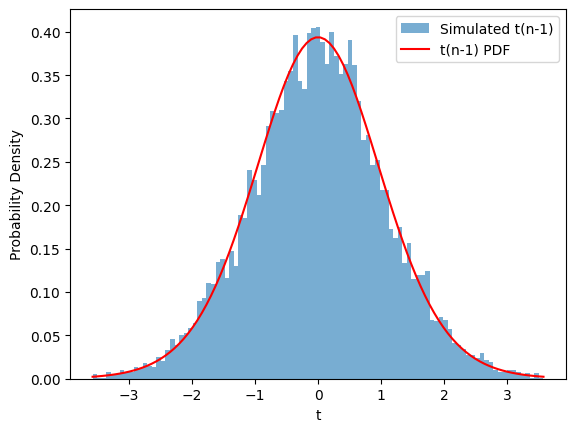

In [1]:
#导入相关库
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

#设置总体均值和标准差
mu = 5
sigma = 2

#设置样本大小和模拟次数
n = 20
num_simulations = 10000

#初始化一个数组，用于存储样本均值的标准化变量
t_statistic_values = []

#进行模拟
for i in range(num_simulations):
    #从正态总体生成样本数据
    sample_data = np.random.normal(mu, sigma, n)
    
    #计算样本均值
    sample_mean = np.mean(sample_data)
    
    #计算样本标准差（分母为n-1）
    sample_std = np.std(sample_data, ddof=1)
    
    #计算样本均值的标准化变量
    t_statistic = (sample_mean - mu) / (sample_std / np.sqrt(n))
    
    #存入空数组
    t_statistic_values.append(t_statistic)

#计算自由度
df = n-1

#生成t分布
t_distribution = stats.t(df)

#绘制t分布和模拟结果的直方图
x = np.linspace(stats.t.ppf(0.001, 19), stats.t.ppf(0.999, 19), 100)
plt.hist(t_statistic_values, bins=x, density=True, alpha=0.6, label='Simulated t(n-1)') #绘制模拟结果
plt.plot(x, t_distribution.pdf(x), 'r', label='t(n-1) PDF') #绘制t分布的概率密度曲线
plt.legend() #绘制图例
plt.xlabel('t')
plt.ylabel('Probability Density')
plt.show()

由图示结果曲线与直方图的吻合度可知$\frac{(\bar{X}-\mu)}{S/\sqrt{n}}$符合t（n-1）分布。